<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Question: How does consumer buying effect the carbon footprint of consumer industries?

In [25]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/SupplyChainEmissions.csv')

df = df.drop(columns=['Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions',
    '2017 NAICS Code': 'NAICS Code'
}, inplace=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAICS Code            1016 non-null   int64  
 1   Industry              1016 non-null   object 
 2   GHG                   1016 non-null   object 
 3   Unit                  1016 non-null   object 
 4   Emissions_No_Margins  1016 non-null   float64
 5   Margins               1016 non-null   float64
 6   Total_Emissions       1016 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 55.7+ KB


Basic viewing of industry emission scale

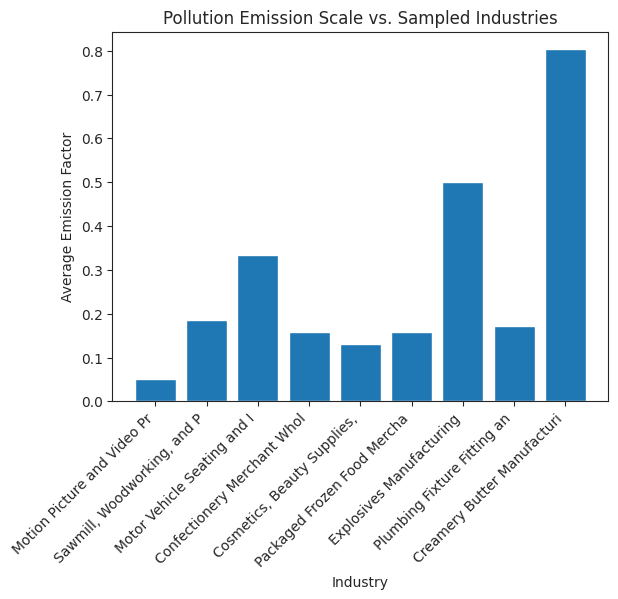

In [27]:

import matplotlib.pyplot as plt




sample_df = df.sample(9)
x = sample_df['Industry']
y = sample_df['Total_Emissions']



plt.bar(x.str[:27],
        y,
        label="Pollution Emission Scale vs. Industry")
plt.xlabel("Industry")
plt.ylabel('Average Emission Factor')
plt.title("Pollution Emission Scale vs. Sampled Industries")
plt.xticks(rotation=45, ha="right")
plt.show()

Mapping data to fit research question through categories

In [28]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'

# filtering of industries (2017 naics title) to create specific categories that are usable for project
keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Electricity', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing', 'Gas'],
    'Food, Farming, & Beverages': ['Farm', 'Food', 'Beverage', 'Alcohol', 'Snack', 'Fish', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery', 'Restaurant', 'Tortilla', 'Corn', 'Farming', 'Dining', 'Flour', 'Pasta', 'Bakery', 'Bakeries', 'Convenience'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Taxi', 'Airplane', 'Car', 'Train', 'Bus', 'Transport'],
    'Fashion': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear', 'Fashion', 'Designer', 'Jewelry'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary', 'Vet', 'Safety', 'Ambulance', 'Clinic', 'Medicine'],
    'Entertainment / Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture', 'Movie', 'TV', 'Gambling', 'Casino', 'Game', 'Sports', 'Gaming', 'Theatre', 'Park'],
    'Financial & Organization Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing', 'Claims', 'Loan', 'Brokers', 'Trust', 'Court', 'Financial', 'Consulting'],
    'Manufacturing and Development': ['Manufacturing', 'Engineering', 'Corperate', 'Production', 'Extraction', 'Fuel', 'Development', 'Research', 'Refining', 'Internet']
}

# Loops through all industries, searches and finds matching keywords, creates a boolean mask, and then assigns it to one of the above categories.
for category, keywords in keywords_map.items():
    sortdef = r'\b(' + '|'.join(keywords) + r')\b'
    bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
    df_consumer.loc[bmask, 'Consumer Category'] = category


# --> samples data for proofing and checking
print("number of industries assigned to each category:")
print(df_final['Consumer Category'].value_counts())

print("\nsample of mapped industries:")
print(df_final[['Industry', 'Consumer Category']].sample(10))

number of industries assigned to each category:
Consumer Category
Manufacturing and Development    261
Other                             54
Food, Farming, & Beverages        31
Fashion                            9
Housing & Utilities                1
Transportation                     1
Name: count, dtype: int64

sample of mapped industries:
                                              Industry  \
1                     Oilseed (except Soybean) Farming   
312  Motor Vehicle Gasoline Engine and Engine Parts...   
143     All Other Basic Organic Chemical Manufacturing   
122       Corrugated and Solid Fiber Box Manufacturing   
62            Nonchocolate Confectionery Manufacturing   
47               Copper, Nickel, Lead, and Zinc Mining   
49   Crushed and Broken Limestone Mining and Quarrying   
222      Power Boiler and Heat Exchanger Manufacturing   
142  Cyclic Crude, Intermediate, and Gum and Wood C...   
337       Office Furniture (except Wood) Manufacturing   

                 

/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bmask = df_consumer['Industry'].str.contains(sortdef, case=False)
/tmp/ipython-input-1747940233.py:23: UserWarning

Creating a prototype bar plot to display carbon footprint in each created category

/tmp/ipython-input-938126296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')


\ghg emissions by consumer spending category:
Consumer Category
Food, Farming, & Beverages           0.573810
Manufacturing and Development        0.340860
Housing & Utilities                  0.282571
Transportation                       0.263500
Other                                0.243414
Fashion                              0.238846
Entertainment / Recreation           0.119348
Healthcare                           0.116429
Financial & Organization Services    0.074524
Name: Total_Emissions, dtype: float64


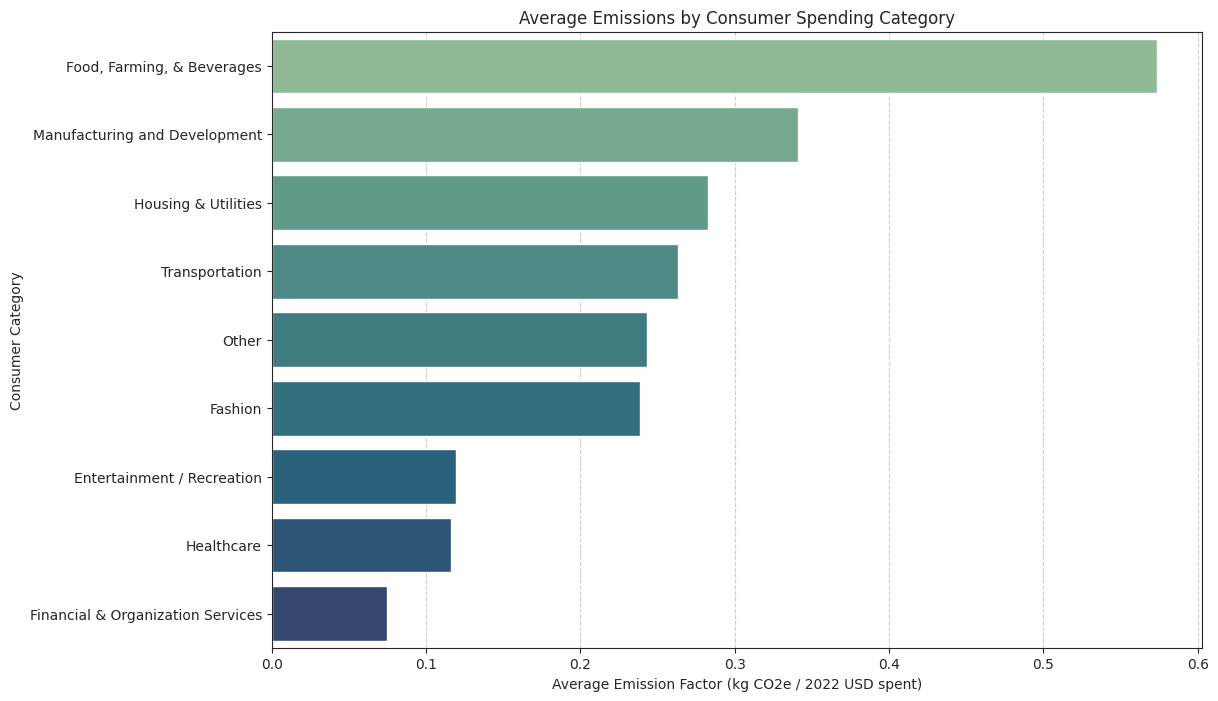

In [29]:
import seaborn as sns

# average emission factor for each consumer categ
emission_factor_avg = df_consumer.groupby('Consumer Category')['Total_Emissions'].mean().sort_values(ascending=False)

print("\ghg emissions by consumer spending category:")
print(emission_factor_avg)


sns.set_style('ticks')
plt.figure(figsize=(12, 8))
sns.barplot(x=emission_factor_avg.values, y=emission_factor_avg.index, palette='crest')
plt.title('Average Emissions by Consumer Spending Category')
plt.xlabel('Average Emission Factor (kg CO2e / 2022 USD spent)')
plt.ylabel('Consumer Category')
plt.grid(axis='x', linestyle='--')
plt.show()

In [30]:
# I'm importing another dataset with the same industries in order to see the exports value connected to industries

import pandas as pd
import matplotlib as plt
pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')

exports_df = pd.read_csv('/content/drive/MyDrive/Carbon-Emissions_CS_DSRP/export_value.csv')
exported_df = exports_df.drop(df.index[[0, 1,2]])
df_cleaned = exported_df.dropna(subset=['Total Exports Value ($US)'])
df_cleaned = df_cleaned.reset_index(drop=True)

print(df_cleaned.head())
print("-------")
print(df_consumer.head())

print("-------")


df_cleaned.head(11)
df_cleaned.head(11)
print("-------")
df_cleaned.info()
df_consumer.info()

                          Commodity Total Exports Value ($US)
0            1111 Oilseeds & Grains             3,094,052,185
1                    11111 Soybeans               699,526,766
2                   111110 Soybeans               699,526,766
3   11112 Oilseeds (except Soybean)                15,826,919
4  111120 Oilseeds (except Soybean)                15,826,919
-------
   NAICS Code                          Industry       GHG  \
0      111110                   Soybean Farming  All GHGs   
1      111120  Oilseed (except Soybean) Farming  All GHGs   
2      111130          Dry Pea and Bean Farming  All GHGs   
3      111140                     Wheat Farming  All GHGs   
4      111150                      Corn Farming  All GHGs   

                                Unit  Emissions_No_Margins  Margins  \
0  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
1  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
2  kg CO2e/2022 USD, purchaser price    

In [31]:
combined_df = pd.merge(df_consumer,df_cleaned, how="inner", left_on='Industry', right_on='Commodity')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NAICS Code                 0 non-null      int64  
 1   Industry                   0 non-null      object 
 2   GHG                        0 non-null      object 
 3   Unit                       0 non-null      object 
 4   Emissions_No_Margins       0 non-null      float64
 5   Margins                    0 non-null      float64
 6   Total_Emissions            0 non-null      float64
 7   Consumer Category          0 non-null      object 
 8   Commodity                  0 non-null      object 
 9   Total Exports Value ($US)  0 non-null      object 
dtypes: float64(3), int64(1), object(6)
memory usage: 132.0+ bytes


In [32]:
df_consumer.head()
df_consumer['Industry'].value_counts()

,count
Industry,
"Other Similar Organizations (except Business, Professional, Labor, and Political Organizations)",1
Soybean Farming,1
Oilseed (except Soybean) Farming,1
Dry Pea and Bean Farming,1
Wheat Farming,1
...,...
Apple Orchards,1
Citrus (except Orange) Groves,1
Orange Groves,1


In [34]:


# gets only the int part of the naics code in the string.
naics = df_cleaned['Commodity'].str.split().str[0]

# this gets only leading numeric data.
# regex r'^(\d+)' finds all ints at the beginning of the string.
df_cleaned['NAICS Code'] = naics.str.extract(r'^(\d+)', expand=False)

# Drop rows where a naics isnt good (these become NaN).
df_consumer.dropna(subset=['NAICS Code'], inplace=True)

# convert NAICS code column to an int type.
df_cleaned['NAICS Code'] = df_cleaned['NAICS Code'].astype(int)
df_cleaned['Exports Value (USD)'] = df_cleaned['Total Exports Value ($US)'].str.replace(',', '').astype('int64')
# inner merge on NAICS Code
df_final = pd.merge(df_consumer, df_cleaned, on='NAICS Code', how='inner')
df_final = df_final.drop(columns=['Commodity', 'Total Exports Value ($US)'])


print("Merged DataFrame Head:")
print(df_final.head())

# Display info to check the new structure and data types.
print("\nMerged DataFrame Info:")
df_final.info()

Merged DataFrame Head:
   NAICS Code                          Industry       GHG  \
0      111110                   Soybean Farming  All GHGs   
1      111120  Oilseed (except Soybean) Farming  All GHGs   
2      111130          Dry Pea and Bean Farming  All GHGs   
3      111140                     Wheat Farming  All GHGs   
4      111150                      Corn Farming  All GHGs   

                                Unit  Emissions_No_Margins  Margins  \
0  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
1  kg CO2e/2022 USD, purchaser price                 0.488    0.044   
2  kg CO2e/2022 USD, purchaser price                 0.809    0.040   
3  kg CO2e/2022 USD, purchaser price                 0.809    0.040   
4  kg CO2e/2022 USD, purchaser price                 0.809    0.040   

   Total_Emissions           Consumer Category  Exports Value (USD)  
0            0.532  Food, Farming, & Beverages            699526766  
1            0.532  Food, Farming, & Bevera